## Project-2 | Supervised Learning

1.Read the column description and ensure you understand each attribute well

In [9]:
import warnings 
warnings.filterwarnings('ignore')
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print("\033[94m\033[1m1. Dimension of dataset :\x1b[0m",list(loan_df.shape )[0] ,
      " Rows &",list(loan_df.shape )[1] ," Columns")
total_rows1 = list(loan_df.shape )[0]
print("\033[94m\033[1m2. Column Names:\x1b[0m")
for i,col in enumerate(loan_df.columns.tolist(),start=1):
    print (" {}.{} ".format(i,col))
print("\033[94m\033[1m3. There is/are \x1b[0m", loan_df[loan_df.isnull().isna()].count().sum(),
       "\033[94m\033[1mmissing value(s) or na in the data set.\x1b[0m")
print("\033[94m\033[1m4. Data Info:\x1b[0m")
print("-"*50)
print(loan_df.info())

1. Dimension of dataset : 5000  Rows & 14  Columns
2. Column Names:
 1.ID 
 2.Age 
 3.Experience 
 4.Income 
 5.ZIP Code 
 6.Family 
 7.CCAvg 
 8.Education 
 9.Mortgage 
 10.Personal Loan 
 11.Securities Account 
 12.CD Account 
 13.Online 
 14.CreditCard 
3. There is/are  0 missing value(s) or na in the data set.
4. Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online

2.Study the data distribution in each attribute, share your findings. (5 points)

In [4]:
print("\033[94m\033[1mDescriptive statistics of the dataset:\x1b[0m")
print("-"*40)
loan_df.describe().transpose()

Descriptive statistics of the dataset:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
print("\033[94m\033[1mCorrelation Matrix of the dataset:\x1b[0m")
print("-"*35)
loan_df.corr()

Correlation Matrix of the dataset:
-----------------------------------


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Correlation Heatmap of the cars-dataset:
----------------------------------------


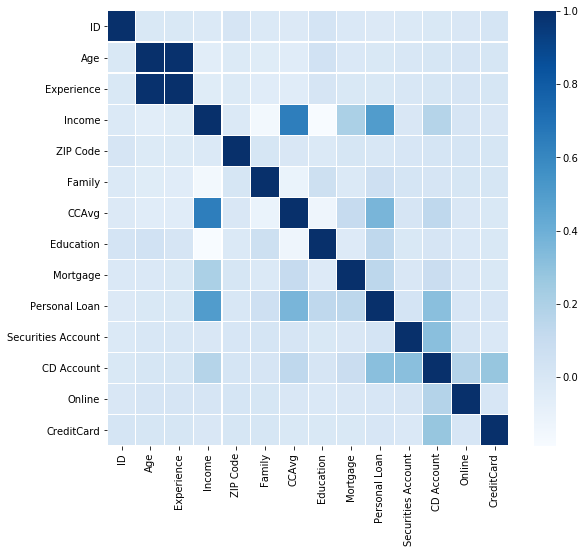

In [6]:
print("\033[94m\033[1mCorrelation Heatmap of the cars-dataset:\x1b[0m")
print("-"*40)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(loan_df.corr(), ax = ax, cmap ="Blues", linewidths = 0.1) 

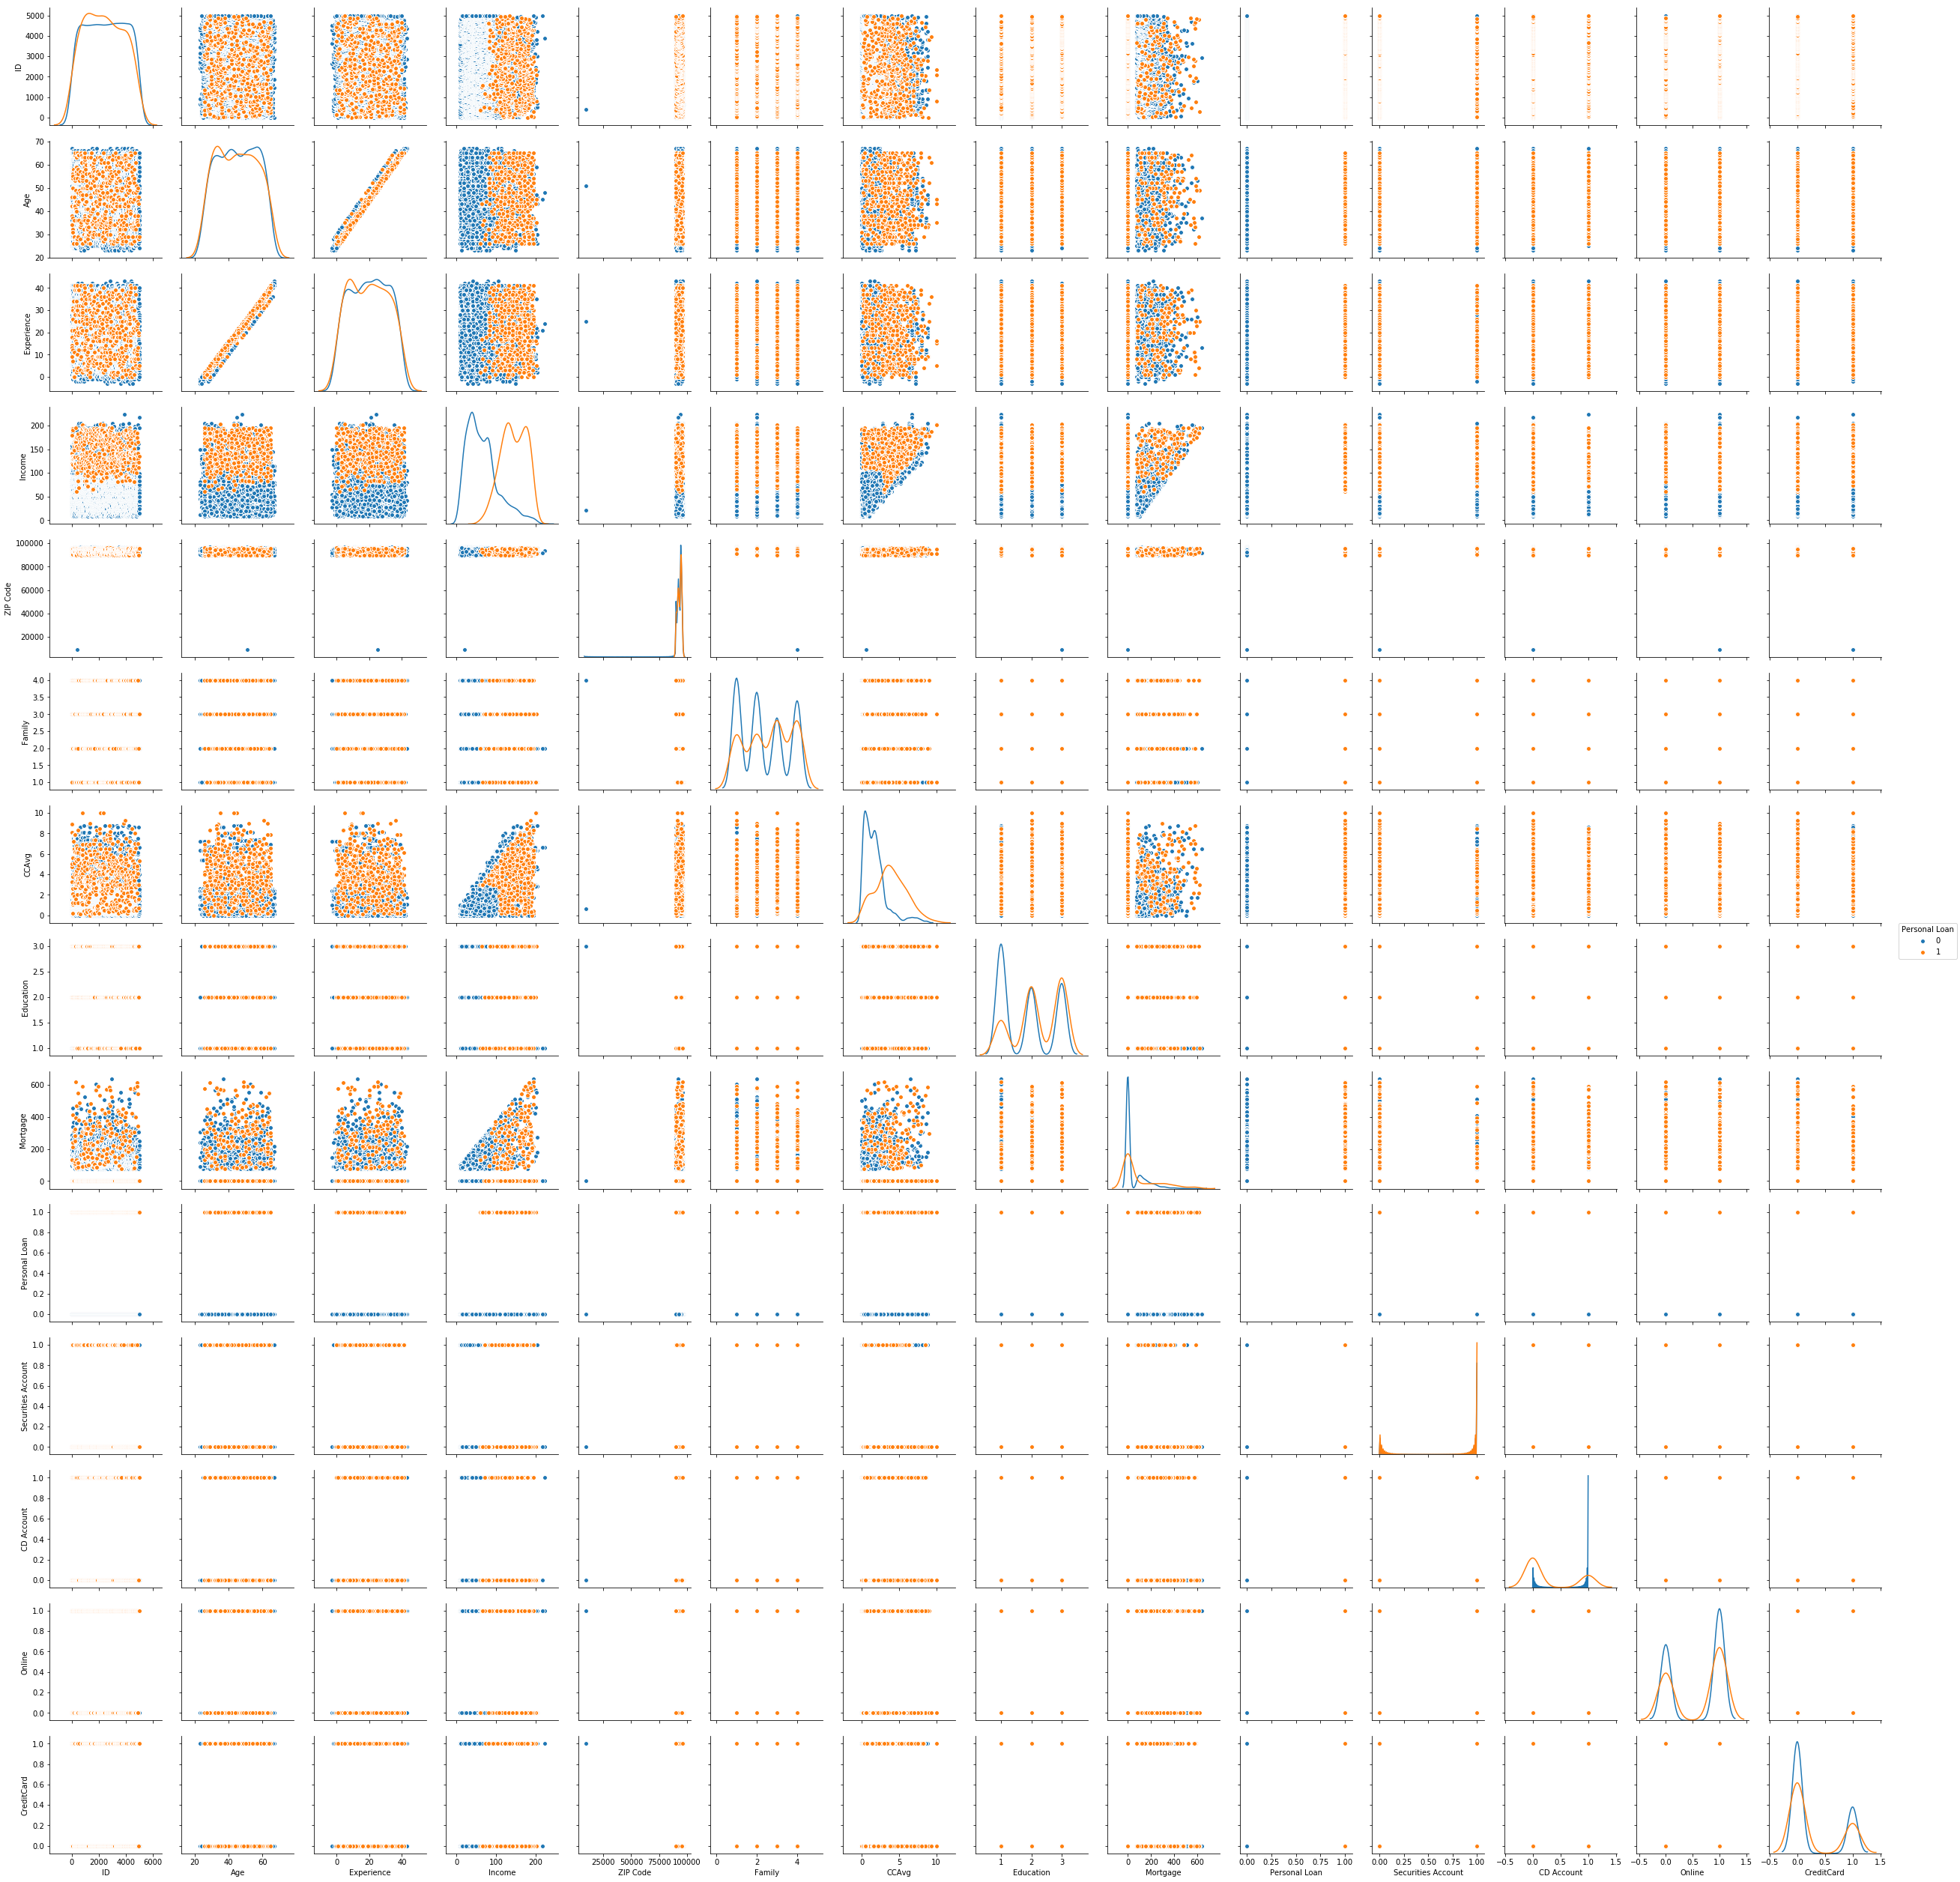

In [7]:
sns.pairplot(loan_df, diag_kind='kde', hue = "Personal Loan")

3.Get the target column distribution. Your comments

In [45]:
print(loan_df["Personal Loan"].value_counts())
print(loan_df["Personal Loan"].value_counts(normalize=True) * 100)

0    4520
1     480
Name: Personal Loan, dtype: int64
0    90.4
1     9.6
Name: Personal Loan, dtype: float64


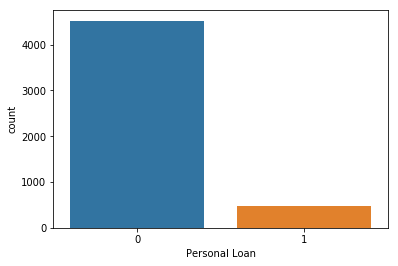

In [34]:
sns.countplot(x="Personal Loan", data = loan_df)

9.6% percentage samples are labled as 1 or yes (accept the personal loan offered in the last campaign)

4.Split the data into training and test set in the ratio of 70:30 respectively

In [47]:
target = loan_df["Personal Loan"]
features = loan_df.drop(["Personal Loan"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 1)
X_train_z = X_train.apply(zscore)
X_test_z  = X_test.apply(zscore)

5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

In [48]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

Logistic_model = LogisticRegression()
Logistic_model.fit(X_train_scaled, y_train)
Logistic_y_predict = Logistic_model.predict(X_test_scaled)

In [49]:
k_range =list(range(1,int(np.sqrt(len(y_train))+1))) 
    #Should not be too small or too large. Thumb rule is max k = sqrt(n of Train Dataset)+1
for odd in k_range: 
    if odd % 2 == 0 : #K value should be odd
        k_range.remove(odd)
for notmultiple in k_range: 
    if notmultiple % len(loan_df["Personal Loan"].unique()) == 0 : #K value must not be multiples of the number of classes
        k_range.remove(notmultiple)

In [50]:
P_Score = []
for k in k_range:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'distance' )
    NNH.fit(X_train_z, y_train)
    predicted_labels = NNH.predict(X_test_z)
    Score = NNH.score(X_test_z, y_test)
    P_Score.append([k,round(Score,4)])
P_Score_df= pd.DataFrame({'K': [i[0] for i in P_Score],'Performance Score': [i[1] for i in P_Score] })

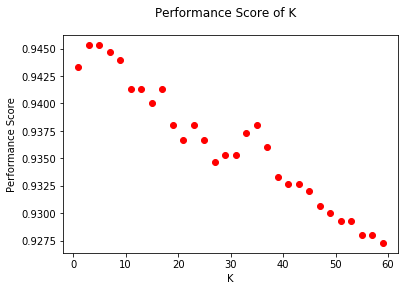

In [51]:
plt.plot(P_Score_df['K'], P_Score_df['Performance Score'], 'bo',color='r')
plt.suptitle('Performance Score of K')
plt.xlabel('K')
plt.ylabel('Performance Score')
plt.show()

In [52]:
opt_k = min(P_Score_df['K'].loc[ (P_Score_df['Performance Score']) == (max(P_Score_df['Performance Score']))])
print("\033[94m\033[1mOptimum K value for this(2 Class) classifcation problem =\x1b[0m",opt_k)

Optimum K value for this(2 Class) classifcation problem = 3


In [53]:
NNH = KNeighborsClassifier(n_neighbors = opt_k , weights = 'distance' )
NNH.fit(X_train_z, y_train)
KNN_predicted_labels = NNH.predict(X_test_z)

In [54]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_predicted = GNB_model.predict(X_test)

6.Print the confusion matrix for all the above models (5 points)

In [55]:
print("\033[91m\033[1mLogistic Regression Model:\x1b[0m")
print("-"*25)
print("\033[94m\033[1mConfusion Matrix :\x1b[0m")
print(metrics.confusion_matrix(y_test, Logistic_y_predict))
print("\033[94m\033[1mClassification Report :\x1b[0m")
print(metrics.classification_report(y_test, Logistic_model.predict(X_test_scaled)))

print("\033[91m\033[1mK-NN Model:\x1b[0m")
print("-"*25)
print("\033[94m\033[1mConfusion Matrix :\x1b[0m")
print(metrics.confusion_matrix(y_test, KNN_predicted_labels))
print("\033[94m\033[1mClassification Report :\x1b[0m")
print(metrics.classification_report(y_test, NNH.predict(X_test_z)))

print("\033[91m\033[1mNaïve Bayes Model:\x1b[0m")
print("-"*25)
print("\033[94m\033[1mConfusion Matrix :\x1b[0m")
print(metrics.confusion_matrix(y_test, GNB_predicted))
print("\033[94m\033[1mClassification Report :\x1b[0m")
print(metrics.classification_report(y_test, GNB_model.predict(X_test)))

Logistic Regression Model:
-------------------------
Confusion Matrix :
[[1333   18]
 [  61   88]]
Classification Report :
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1351
          1       0.83      0.59      0.69       149

avg / total       0.94      0.95      0.94      1500

K-NN Model:
-------------------------
Confusion Matrix :
[[1341   10]
 [  72   77]]
Classification Report :
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1351
          1       0.89      0.52      0.65       149

avg / total       0.94      0.95      0.94      1500

Naïve Bayes Model:
-------------------------
Confusion Matrix :
[[1239  112]
 [  64   85]]
Classification Report :
             precision    recall  f1-score   support

          0       0.95      0.92      0.93      1351
          1       0.43      0.57      0.49       149

avg / total       0.90      0.88      0.89      1500



7.Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Since these models have been done to identify the best model which could
encourage the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. When we compare all the three models, Logistic Regression Model provided the better success rate (recall percentage score of class = 1 or predicted accuracy of the customer who had accepted the personal loan offered in the last campaign) than other two models. Hence, in this case, LOGISTIC REGRESSION MODEL is the best fit